In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
citydata_df = pd.read_csv(city_data_to_load)
ridedata_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(ridedata_df,citydata_df, how='left')

# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
#Funstion to set the colors for a city type
def set_color(c):
   if c == 'Urban':
       return 'lightcoral'
   elif c == 'Rural':
       return 'Gold'
   else:
       return 'lightskyblue'


#Calculations for a new summary table
totalrides_per_city = combined_df['city'].value_counts()
grouped_by_city = combined_df.groupby(['city'])
average_fare = grouped_by_city['fare'].mean()
drivers = grouped_by_city['driver_count'].mean()
city_type = grouped_by_city['type'].unique()
city_type = city_type.str[0]


#Creating a new summary table for plotting
summary_df = pd.DataFrame({
    "Total number of rides (Per City)": totalrides_per_city ,
    "Average Fare ($)": average_fare,
    "Number of drivers (Per City)": drivers,   
    "City Types": city_type
})
summary_df.head()

,Total number of rides (Per City),Average Fare ($),Number of drivers (Per City),City Types
Amandaburgh,18,24.641667,12,Urban
Barajasview,22,25.332273,26,Urban
Barronchester,16,36.422500,11,Suburban
Bethanyland,18,32.956111,22,Suburban
Bradshawfurt,10,40.064000,7,Rural


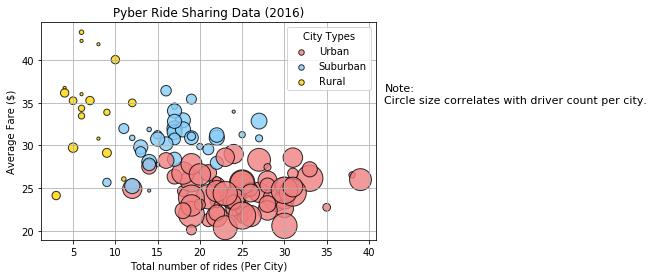

<Figure size 432x288 with 0 Axes>

In [3]:
#Creating a new column with an assigned color for a city type
colorList = list(summary_df['City Types'].astype(str))
colorList= [set_color(c) for c in colorList]
summary_df['color'] = colorList

# build the custom legend
for myType in ['Urban', 'Suburban', 'Rural']:
    plt.scatter([], [], s=30, label=myType, c=set_color(myType), edgecolors='black', alpha=0.8)
plt.legend(scatterpoints=1, frameon=True, title='City Types')

#Specifying the plot arguments and methods to do a scatter plot
x=summary_df['Total number of rides (Per City)']
y=summary_df['Average Fare ($)']
s=summary_df['Number of drivers (Per City)']
plt.scatter(x, y, marker='o',s=s*10, c=colorList, edgecolor='Black', alpha=0.8)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total number of rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Adding a text msg at the side of the graph
textstr = 'Note:\nCircle size correlates with driver count per city.'
plt.text(0.92, 0.6, textstr, fontsize=11, transform=plt.gcf().transFigure)
plt.show()
plt.savefig("Pyber bubble plot.png")


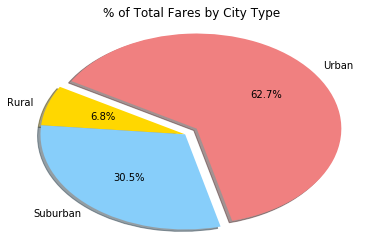

In [4]:
# Calculate Type Percents
total_Fares = combined_df.groupby(['type'])['fare'].sum().to_dict()
size = total_Fares.values()
label = total_Fares.keys()
explode = (0, 0, 0.1)
colors = ['gold','lightskyblue','lightcoral']
# Build Pie Chart
plt.pie(size, explode=explode, labels=label, colors=colors, shadow=True, startangle=150, autopct="%1.1f%%")
plt.axis('auto')
plt.title('% of Total Fares by City Type', fontsize=12)
# Save Figure
plt.savefig('total_fares_by_city.png')
# Show Figure
plt.show()



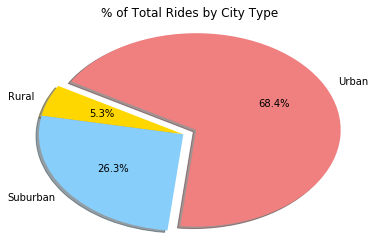

In [5]:
# Calculate Ride Percents
total_rides = combined_df.groupby(['type'])['ride_id'].count().to_dict()
size = total_rides.values()
label = total_rides.keys()
explode = (0, 0, 0.1)
colors = ['gold','lightskyblue','lightcoral']
# Build Pie Chart
plt.pie(size, explode=explode, labels=label, colors=colors, shadow=True, startangle=150, autopct="%1.1f%%")
plt.axis('auto')
plt.title('% of Total Rides by City Type', fontsize=12)
# Save Figure
plt.savefig('total_rides_by_city.png')
# Show Figure
plt.show()





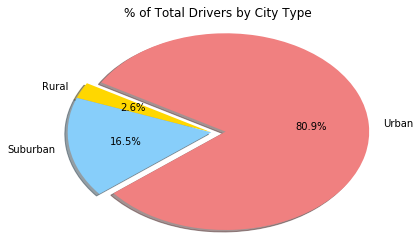

In [6]:
# Calculate Ride Percents

total_drivers = 100 * citydata_df.groupby(['type'])['driver_count'].sum() /citydata_df['driver_count'].sum()
label = total_drivers.keys()
explode = (0, 0, 0.1)
colors = ['gold','lightskyblue','lightcoral']
# # Build Pie Chart
plt.pie(total_drivers, explode=explode, labels=label, colors=colors, shadow=True, startangle=150, autopct="%1.1f%%")
plt.axis('auto')
plt.title('% of Total Drivers by City Type', fontsize=12)
# Save Figure
plt.savefig('total_drivers_by_city.png')
# Show Figure
plt.show()

